# Week 2 Part 1 Assignment Graph Visualization

Group Member: Bryan Persaud, Matthew Baker, Zhi Ying Chen

1, Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.

2, Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 

3, Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.

4, Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

# Load Packages

The first step to analyzing this network is to import the packages necessary for the analysis. The first package we imported is networkx. This package provides a comprehensive framework for loading, processing, and analyzing network data in python. The second package we used is matplotlib. This package is useful for displaying plots and figures in the python notebook. The third package we used is pandas. This package creates a data structure called a dataframe (like the ones in R) that can be used to store multiple types of data in a tabular form (rows and columns) to make data analysis more streamlined.

In [1]:
# Load Libraries
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import numpy as np
from IPython.display import SVG, display
from pyvis.network import Network
from pyvis import network as net

%matplotlib inline

We selected the data from the Stanford Network Analysis Project or SNAP. The exact dataset being used is the General Relativity and Quantum Cosmology collaboration network, located here https://snap.stanford.edu/data/ca-GrQc.html.

# Build Graph

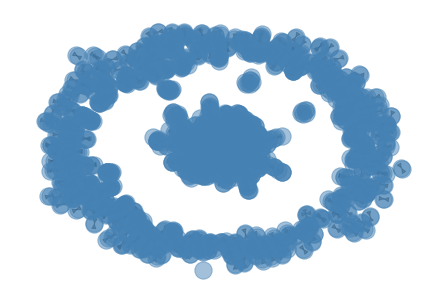

In [3]:
fh = open("ca-GrQc.txt","rb")
G = nx.read_weighted_edgelist(fh, create_using=nx.DiGraph(), nodetype=int)
fh.close()

nx.draw_spring(G,with_labels = False, node_color="steelblue", alpha=0.5)

From the above graph, we can see that graph is kind of mess to see the details, so it will be difficult for us to analysis.

# Analysis Part

Now that the graph has been loaded and previewed, we can conduct some analysis. We will take a quick look at the information of the dataset we chose, such as number of nodes, number of edges, and the average degree, etc.

In [4]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 5242
Number of edges: 28980
Average in degree:   5.5284
Average out degree:   5.5284


The information for the graph can be seen. There are 5242 nodes and 28980 edges.

In [5]:
deg = nx.degree(G)
deg = dict(list(deg))

In [6]:
min(deg.values())

2

In [7]:
max(deg.values())

162

To show the values of the degrees the min and max values were calculated. The min is 2 and the max is 162. Let's plot a histogram showing the degrees.

Text(0, 0.5, 'Frequency')

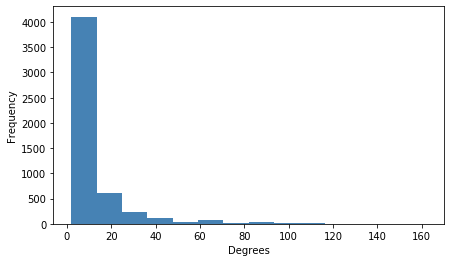

In [8]:
plt.figure(figsize=(7,4))
plt.hist(dict(deg).values(), 14, color = "steelblue")
plt.xlabel('Degrees')
plt.ylabel('Frequency')

The distribution of degrees in the network is heavily left skewed, and most of frequency around 4000 on the degree (0-20).

In [9]:
# # Print out the degrees in a sorted order 
def sorted_dict(d):
    ms = sorted(d.items() , reverse=True, key=lambda x: x[1])
    return ms


# Find the Top Ten of Degree Centrality
ds = sorted_dict(dict(deg))
ds[0:10]

[(21012, 162),
 (21281, 158),
 (22691, 154),
 (12365, 154),
 (6610, 136),
 (9785, 136),
 (21508, 134),
 (17655, 132),
 (2741, 130),
 (19423, 126)]

The degrees were sorted to find the top ten degrees. A histogram will be made to show the degrees in 100 bins.

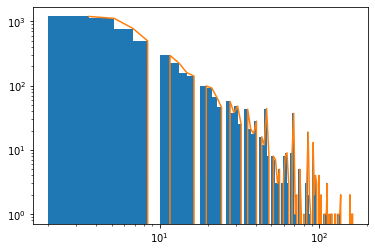

In [10]:
# Display a histogram of node degrees in 100 bins
h = plt.hist(deg.values(), 100)
plt.loglog(h[1][1:], h[0])

As shown in the first visualization, our graph is disconnected. Instead we find the diameter of the largest subgraph in the set.

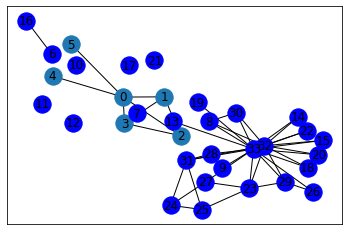

In [11]:
G = nx.karate_club_graph()
res = [0,1,2,3,4,5, 'parrot']

pos = nx.spring_layout(G)  #setting the positions with respect to G, not k.
k = G.subgraph(res) 
plt.figure()
nx.draw_networkx(k, pos=pos)

othersubgraph = G.subgraph(range(6,G.order()))
nx.draw_networkx(othersubgraph, pos=pos, node_color = 'b')
plt.show()

The diameter is defined as the greatest distance between two nodes in a graph, only including the shortest paths between each pair of nodes. This statistic is a good way to measure the overall connectedness of the graph. If the diameter is small, that means that the nodes in the graph are tightly clustered together and each node is connected to many other nodes. If the diameter is larger, that means that there is at least one node that is sparsely linked to other nodes and does not share many connections. As per the assignment instructions, we calculated the diameter of the graph in the code below.

In [12]:
nx.diameter(k)

2

From this largest subgraph in the set we can now see a graph with the nodes connected. We found the diameter for the subgraph to be 2.

# Visualizing Graph

In [13]:
nt = Network('500px', '500px')
nt.from_nx(G)

nt.show('nx.html')

In [15]:
gn = net.Network(notebook=True)
nxg = k
gn.from_nx(nxg)
gn.show("gn.html")

Pyvis was used to create two new graphs of the first graph and the subgraph. The first graph shown is for the entire dataset and shows 34 different nodes with their edges. The second graph shown is for the subgraph of the dataset and shows 6 different nodes with their edges. 

# Week 2 Part 2 - Assignment Centrality Measures

# Assignment

Centrality measures can be used to predict (positive or negative) outcomes for a node.

Your task in this week’s assignment is to identify an interesting set of network data that is available on the web (either through web scraping or web APIs) that could be used for analyzing and comparing centrality measures across nodes.  As an additional constraint, there should be at least one categorical variable available for each node (such as “Male” or “Female”; “Republican”, “Democrat,” or “Undecided”, etc.)

In addition to identifying your data source, you should create a high level plan that describes how you would load the data for analysis, and describe a hypothetical outcome that could be predicted from comparing degree centrality across categorical groups.

# Data 

We will be using data from the Stanford Network Analysis Project or SNAP. The exact dataset being used is the General Relativity and Quantum Cosmology collaboration network, located here https://snap.stanford.edu/data/ca-GrQc.html.

Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its GR-QC section.

# High Level Plan

The data is stored in a txt.gz file. We will download this file from their website and extract it to a .txt file. From here will will load this .txt file onto a jupyter notebook. The analysis will be done using the networkx package. For an author citation network it could be that a central author is: a prolific contributor (has authored many papers), or has written a broad paper that many peers cite, or has written an important breakthrough paper that spawns a field of study

# Source Library

SNAP: A General-Purpose Network Analysis and Graph-Mining Library, Jure Leskovec and Andrej Krevl; June 2014; http://snap.stanford.edu/data

# Citation

J. Leskovec, J. Kleinberg and C. Faloutsos. Graph Evolution: Densification and Shrinking Diameters. ACM Transactions on Knowledge Discovery from Data (ACM TKDD), 1(1), 2007.

# Video Presentations

The video presentation for the week 2 part 1 assignment can be found [here](https://youtu.be/Ip5Kdd0pArA).

The video presentation for the week 2 part 2 assignment can be found [here](https://youtu.be/74JH1BIyLhM).